In [2]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib.pyplot as plt
import numpy as np

<Container object of 3 artists>

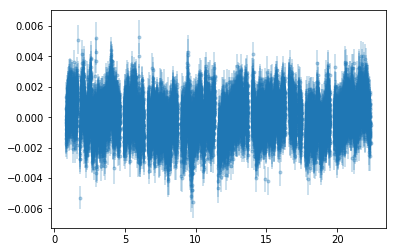

In [3]:
spitzer_time, spitzer_flux, spitzer_err, _ = np.loadtxt('../libra/data/T1_Spitzer.txt', 
                                              unpack=True, delimiter=',')

plt.errorbar(spitzer_time, spitzer_flux, spitzer_err, fmt='.', alpha=0.3)

In [4]:
import celerite
from celerite import terms

p = np.array([-14.49285716,   1.98108915])

kernel = terms.RealTerm(log_a=p[0], log_c=p[1],
                        bounds=dict(log_a=(-30, 30), log_c=(-30, 30)))

gp = celerite.GP(kernel, mean=np.mean(spitzer_flux))
gp.compute(spitzer_time, spitzer_err)  # You always need to call compute once.

In [7]:
from interpacf import interpolated_acf

[Text(0,0.5,'Lomb Scargle Power'), (0.3, 8), Text(0.5,0,'period (days)')]

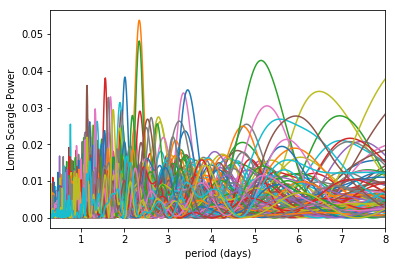

In [19]:
import warnings

upper_lim = 8
periods = np.linspace(0.2, upper_lim, 1000)

halfday = 0.025
n_greater = 0
n_iterations = 100
for _ in range(n_iterations):
    #plt.plot(gp.sample())
    from gatspy import periodic

    model = periodic.LombScargleFast(fit_period=True, optimizer_kwds=dict(quiet=True))
    model.optimizer.period_range = (0.2, upper_lim)
    model.fit(spitzer_time, gp.sample() + np.random.randn(len(spitzer_time))*np.median(spitzer_err), spitzer_err);
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        scores = model.score(periods)
        plt.plot(periods, scores)
    if max(scores) > halfday:
        n_greater += 1
plt.gca().set(xlabel='period (days)', ylabel='Lomb Scargle Power',
        xlim=(0.3, upper_lim))

In [20]:
n_greater/n_iterations

0.33